In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('drive')
os.chdir('My Drive')
os.getcwd()
os.listdir()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


['Colab Notebooks', 'data_sets', 'my_git', 'Europass', '__MACOSX']

In [2]:
! git status
! git add model.h5

fatal: not a git repository (or any of the parent directories): .git


some codes U may need in moving datasets

In [0]:
# import shutil 
# os.chdir('data_sets')
# os.mkdir('fr_datas')
# os.mkdir('fr_datas/train')
# os.mkdir('fr_datas/test')

# ls = [ 'Vazir', 'Farisi', 'Elham']
# for l in ls:
#   a = os.listdir('font_Segments/'+l)
#   os.mkdir('fr_datas/train/'+l)
#   os.mkdir('fr_datas/test/'+l) 
#   for i in range(5000):
#     shutil.copyfile('font_Segments/'+l+'/'+ a[i], 'fr_datas/train/'+l+'/'+ a[i] )
#     print(i)

#   for i in range(1000):
#     shutil.copyfile('font_Segments/'+l+'/'+ a[i+5000], 'fr_datas/test/'+l+'/'+ a[i+5000])
#     print(i)

# os.chdir('..')

In [0]:
# os.chdir('My Drive')
# os.remove('images')
# ! rm -r Vazir (1)
os.listdir('.')

['Colab Notebooks', 'data_sets', 'my_git', 'Europass', '__MACOSX']

In [0]:
! pwd
! ls

/content/drive/My Drive/my_git/Arabic_Farsi_Font_Recognition
data_set		   __MACOSX	Merge	   model.h5
line_segment_detection.py  main1.ipynb	Merge.zip  README.md


In [0]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [0]:
input_img = Input(shape=(32,32,3))
x = Conv2D(64, (3,3), activation= 'relu')(input_img)
x = MaxPool2D(pool_size= (2,2))(x)
x = Conv2D(64, (3,3), activation= 'relu')(x)
x = MaxPool2D(pool_size= (2,2))(x)
x = Conv2D(64, (3,3), activation= 'relu')(x)
x = MaxPool2D(pool_size= (2,2))(x)
x = Flatten()(x)
x = Dense(output_dim= 64, activation='sigmoid')(x)
x = Dense(output_dim= 64, activation='sigmoid')(x)
x = Dense(output_dim= 3, activation='sigmoid')(x)
FR_model = Model(input_img, x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=64)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=64)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=3)`
  # This is added back by InteractiveShellApp.init_path()


In [0]:
FR_model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_date_gen = ImageDataGenerator(rescale= 1./255,
                                    shear_range= .2)

test_date_gen = ImageDataGenerator(rescale= 1./255)


In [0]:
train_set= train_date_gen.flow_from_directory('data_sets/fr_datas/train',
                                              target_size= (32,32),
                                              batch_size= 32,
                                              class_mode= 'categorical')

test_set= test_date_gen.flow_from_directory('data_sets/fr_datas/test',
                                              target_size= (32,32),
                                              batch_size= 32,
                                              class_mode= 'categorical')

Found 15000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [0]:
FR_model.fit_generator(train_set, 
                       samples_per_epoch = 5000,
                       epochs= 20,
                       validation_data = test_set, 
                       nb_val_samples = 1000)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=20, validation_data=<keras_pre..., steps_per_epoch=156, validation_steps=1000)`
  """




Epoch 1/20





156/156 [==============================] - 67s 430ms/step - loss: 0.7519 - acc: 0.6779 - val_loss: 0.3879 - val_acc: 0.8830
Epoch 2/20
156/156 [==============================] - 66s 422ms/step - loss: 0.2478 - acc: 0.9287 - val_loss: 0.1893 - val_acc: 0.9427
Epoch 3/20
156/156 [==============================] - 66s 425ms/step - loss: 0.1229 - acc: 0.9641 - val_loss: 0.1441 - val_acc: 0.9571
Epoch 4/20
156/156 [==============================] - 66s 425ms/step - loss: 0.1108 - acc: 0.9647 - val_loss: 0.1576 - val_acc: 0.9483
Epoch 5/20
156/156 [==============================] - 66s 424ms/step - loss: 0.0632 - acc: 0.9810 - val_loss: 0.1120 - val_acc: 0.9664
Epoch 6/20
156/156 [==============================] - 65s 414ms/step - loss: 0.0617 - acc: 0.9814 - val_loss: 0.0804 - val_acc: 0.9733
Epoch 7/20
156/156 [==============================] - 68s 434ms/step - loss: 0.0509 - acc: 0.9840 - val_loss: 0.0792 - val_acc: 0.9708
Epoch 8/20
156/156 [============================

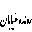

In [0]:
import numpy as np
from keras.preprocessing import image
example_dir = 'data_sets/font_Segments/Farisi'
a = os.listdir(example_dir)
rand = np.random.randint(low = 0 , high = len(a)-1)
img = image.load_img(example_dir + '/' + a[rand], target_size= (32,32))
img

In [0]:
test_img = image.img_to_array(img)
test_img = np.expand_dims(test_img , axis=0)
test_img.shape

(1, 32, 32, 3)

In [0]:
result = FR_model.predict(test_img)

In [0]:
result

array([[1.16755014e-04, 6.51489258e-01, 3.36414203e-04]], dtype=float32)

In [0]:
train_set.class_indices

{'Elham': 0, 'Farisi': 1, 'Vazir': 2}

In [0]:
FR_model.save_weights('my_git/Arabic_Farsi_Font_Recognition/model.h5')